In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Historical Product Demand.csv')

In [ ]:
df.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [ ]:
df.shape

(1048575, 5)

In [ ]:
df.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date',
       'Order_Demand'],
      dtype='object')

In [ ]:
df.Product_Code.unique()

array(['Product_0993', 'Product_0979', 'Product_1159', ...,
       'Product_0237', 'Product_0644', 'Product_0853'], dtype=object)

In [ ]:
df.Warehouse.unique()

array(['Whse_J', 'Whse_S', 'Whse_C', 'Whse_A'], dtype=object)

In [ ]:
df.Product_Category.nunique()

33

In [ ]:
df.dtypes

Product_Code        object
Warehouse           object
Product_Category    object
Date                object
Order_Demand        object
dtype: object

In [ ]:
def check_order_demand(x):
    try:
        int(x)
    except:
        return False
    return True
#Check where Order_demand is not an integer
df[~df.Order_Demand.apply(lambda x: check_order_demand(x))].head(6)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
112290,Product_2169,Whse_A,Category_024,2012/8/9,(1)
112307,Product_2132,Whse_A,Category_009,2012/11/1,(24)
112308,Product_2144,Whse_A,Category_009,2012/11/1,(24)
112356,Product_2118,Whse_A,Category_009,2012/3/7,(50)
112357,Product_2120,Whse_A,Category_009,2012/3/7,(100)
112360,Product_1794,Whse_A,Category_024,2012/6/28,(1)


In [ ]:
def change_to_int(x):
    try:
        return int(x)
    except:
        return int(x[1:-1])
check = '(10)'
change_to_int(check)

10

In [ ]:
df.Order_Demand = df.Order_Demand.apply(lambda x: change_to_int(x) )

In [ ]:
df.describe()

,Order_Demand
count,1.048575e+06
mean,4.906977e+03
std,2.892678e+04
min,0.000000e+00
25%,2.000000e+01
50%,3.000000e+02
75%,2.000000e+03
max,4.000000e+06


In [ ]:
df = df.rename(columns = {'Product_Code': 'Code',
                    'Product_Category':'Category',
                    'Order_Demand':'Demand'})
df.head()

,Code,Warehouse,Category,Date,Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [ ]:
100 * df.isna().sum()[3]/ df.shape[0]

1.0718355863910545

In [ ]:
df = df.dropna()
df.isna().sum()

Code         0
Warehouse    0
Category     0
Date         0
Demand       0
dtype: int64

In [ ]:
df.Date.min(), df.Date.max()

('2011/1/8', '2017/1/9')

<Axes: xlabel='Warehouse', ylabel='count'>

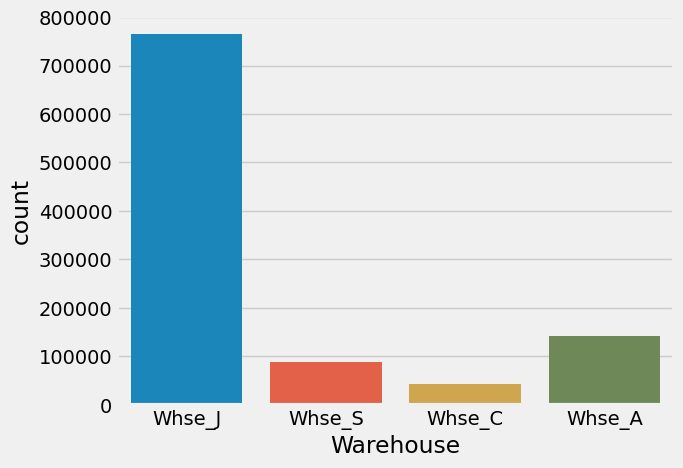

In [ ]:
# Find the aggregate demand among the warehouses
sns.countplot(x = 'Warehouse', data = df)

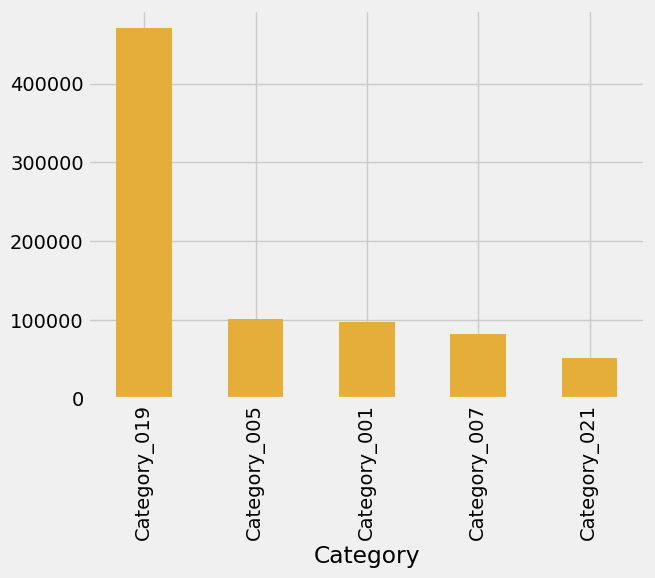

In [ ]:
# Plot the 5 most popular category
df.Category.value_counts().head(5).plot(kind = 'bar', color = color_pal[2])
plt.xlabel('Category')
plt.show()

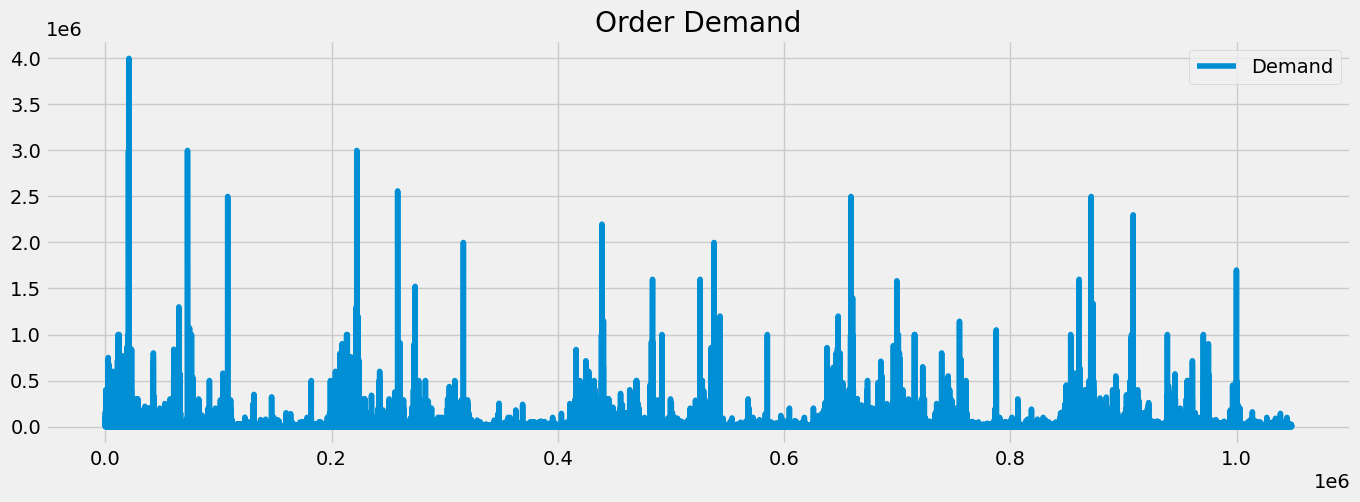

In [ ]:
df.plot(kind = 'line',figsize=(15, 5),color = color_pal[0], title = 'Order Demand' )
plt.show()

In [ ]:
df.Demand.skew()

31.432925049321977

In [ ]:
# Total Demand by Warehouse
warehouse_Demand = df.groupby('Warehouse')['Demand'].sum()
warehouse_Demand

Warehouse
Whse_A     147877431
Whse_C     585071404
Whse_J    3363200396
Whse_S    1038024700
Name: Demand, dtype: int64

<Axes: ylabel='Sum of the demand'>

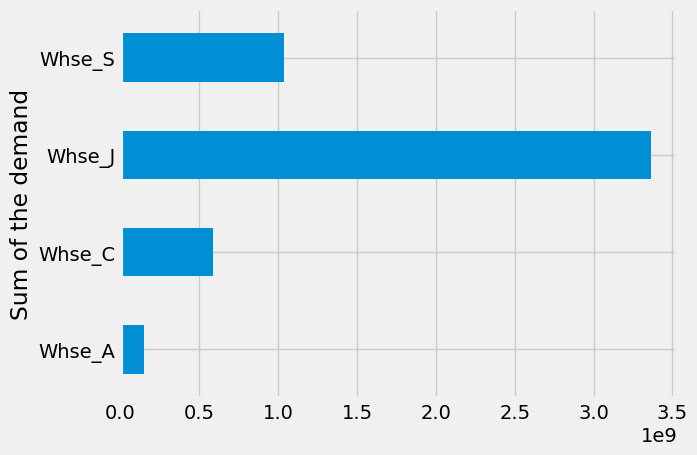

In [ ]:
warehouse_Demand.plot(kind = 'barh', ylabel = 'Sum of the demand' )

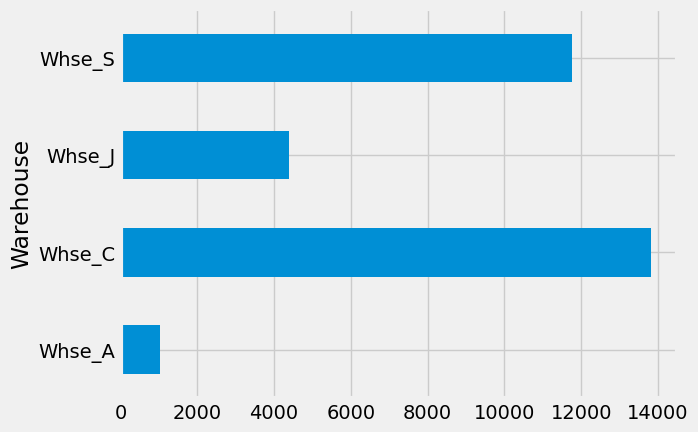

In [ ]:
df.groupby('Warehouse')['Demand'].mean().plot(kind = 'barh')
plt.show()

In [ ]:
df.head()

,Code,Warehouse,Category,Date,Demand
0,Product_0993,Whse_J,Category_028,2012/7/27,100
1,Product_0979,Whse_J,Category_028,2012/1/19,500
2,Product_0979,Whse_J,Category_028,2012/2/3,500
3,Product_0979,Whse_J,Category_028,2012/2/9,500
4,Product_0979,Whse_J,Category_028,2012/3/2,500


In [1]:
# features, Target variable
Features = ['day_of_the_week', 'Quarter','Month', 'Year', 'Week']
target = ['Demand']